<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes</em><br>

</div>

### Análisis de Datos: Tarea 02
#### Integrantes: 
` Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

In [85]:
import pandas as pd               #Manejo de datos en Tablas
import numpy as np
from  matplotlib import pyplot as plt   #Creación de visualizaciones 
import seaborn as sns             #Creación de visualizaciones  

sns.set_theme() #inicializacion de tematica de seaborn

#### 2. Lectura de archivo

In [86]:
# Ruta relativa al archivo
ruta_archivo = r'.\Data\2023-03-08 Precios Casas RM Limpio.csv'
df = pd.read_csv(ruta_archivo, index_col=0)
# Mostrar las primeras filas del DataFrame
df.head(10)

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1
5,94000000,2641,117061,EstaciónCentral,Avenida5deAbril,2,1.0,72.0,131.0,0
6,75000000,2107,93400,Colina,GabrielaMistral/PabloNeruda,3,1.0,70.0,80.0,2
7,105000000,2950,130760,LaFlorida,SanCristóbalTres,2,1.0,50.0,120.0,1
8,76000000,2135,94645,Maipú,PasajeJosédeMoraleda,3,1.0,72.0,72.0,1
9,76000000,2135,94645,Maipú,Matías,3,1.0,46.0,90.0,1


**Desición** Se eliminal las columnas price_clp y price_usd pues son colineales con price_uf

In [87]:
df.drop(['price_clp','price_usd'],axis=1 ,inplace=True)
df.head()

,price_uf,comuna,ubicacion,dorms,baths,built_area,total_area,parking
0,11500,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3
1,2950,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1
2,3600,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2
3,2107,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1
4,1489,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1


#### 3. Teoria detras del modelo

**Ecuación de Regresión Lineal |** $y = \beta_0 + \beta_1 x + \epsilon$

Los parámetros son propiedades de las poblaciones, por lo que nunca podemos conocer sus valores verdaderos a menos que se observe toda la población.

- Las estimaciones de los parámetros se calculan a partir de datos muestrales.
- Las estimaciones se denotan con un ^ sombrero.

**Estimación de la Regresión Lineal |** $\hat{y} = \hat{\beta_0} + \hat{\beta_1} x + \epsilon$

**Coeficientes de Regresión |** Los betas estimados en un modelo de regresión. Se representan como $\hat{\beta_i}$.

**Estimación de Mínimos Cuadrados Ordinarios (MCO) |** Método común para calcular los coeficientes de regresión lineal $\hat{(\beta)}_n$

**Función de Pérdida |** Una función que mide la distancia entre los valores observados y los valores estimados por el modelo.

##### 3.1 Estimacion de Minimos Cuadrados Ordinarios

El método de mínimos cuadrados ordinarios (MCO) se utiliza en el análisis de regresión lineal para estimar los parámetros desconocidos del modelo de regresión lineal. El objetivo de la estimación por MCO es encontrar los valores de los coeficientes de regresión que minimicen la suma de los errores al cuadrado entre los valores predichos y los valores reales de la variable dependiente.

**Línea de Mejor Ajuste |** La línea que ajusta mejor los datos al minimizar alguna función de pérdida o error.

**Valores Predichos |** Los valores estimados (y) para cada (x) calculados por un modelo.

**Residuo |** La diferencia entre los valores observados o reales y los valores predichos de la línea de regresión.
- Residuo = Observado - Predicho ---> $\epsilon_i = y_i - \hat{y_i}$

**Suma de Residuos al Cuadrado (RSS) |** La suma de las diferencias al cuadrado entre cada valor observado y su valor predicho asociado.
- $RSS = \sum\limits_{i=1}^{n}(Observado - Predicho)^2$
- $RSS = \sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2$

**Mínimos Cuadrados Ordinarios (MCO) |** Un método que minimiza la suma de los residuos al cuadrado para estimar los parámetros en un modelo de regresión lineal.
- Usado para calcular: $\hat{y}=\hat{\beta_0} + \hat{\beta_1(x)}$
- Con: $\hat{\beta_1} = \frac{\sum_{i=1}^N{(X_i-\bar{X})(Y_i-\bar{Y})}}{\sum_{i=1}^N{(X_i-\bar{X}})^2} = \frac{cov_{x,y}}{var_x}$

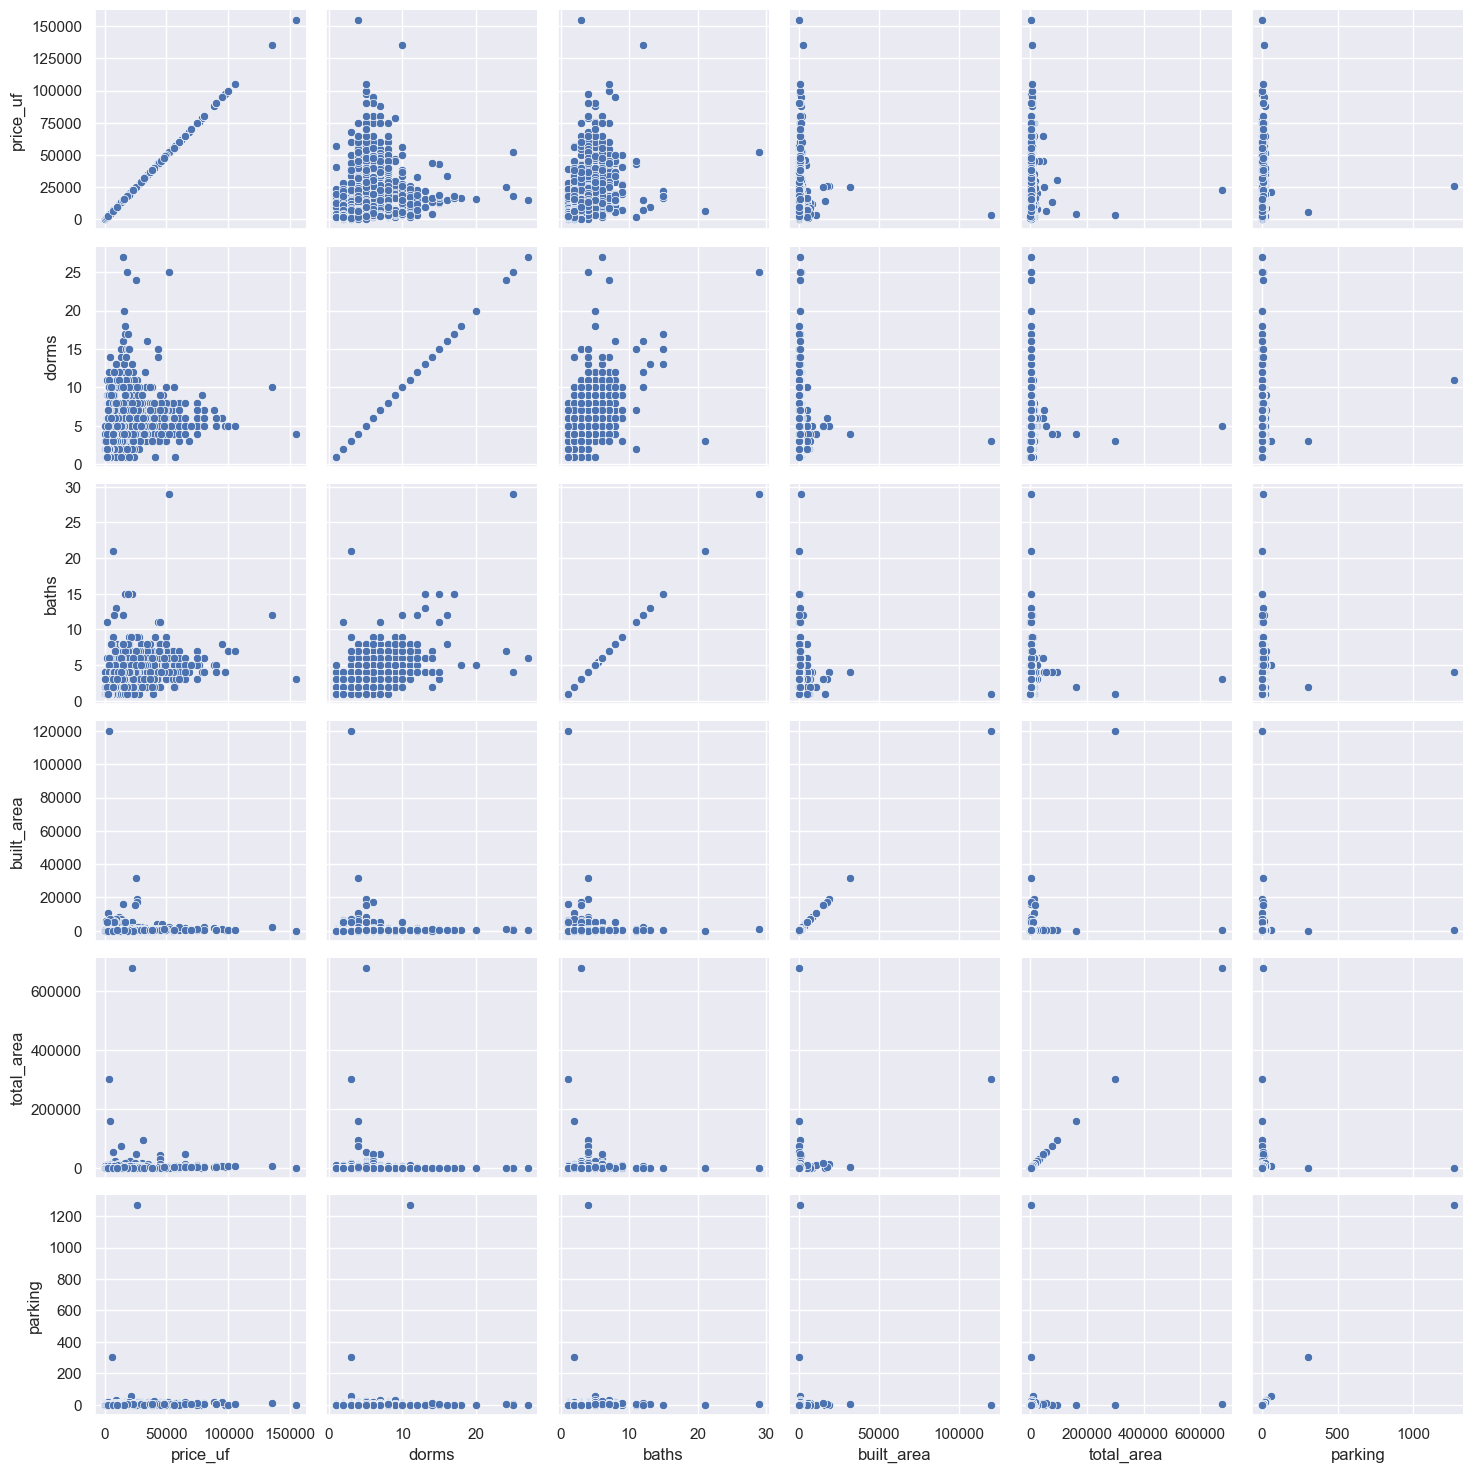

In [88]:
sns.pairplot(df.select_dtypes(include=np.number),diag_kind=None)
plt.show()

In [89]:
# Seleccionamos las columnas relevantes
# Guardamos el DataFrame resultante en una variable separada para la regreción

rl_data = df[["price_uf", "dorms"]]

# Primeras 5 filas
rl_data.head()

,price_uf,dorms
0,11500,7
1,2950,2
2,3600,3
3,2107,3
4,1489,2


In [90]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [91]:

rl_formula = "price_uf ~ dorms"


OLS = ols(formula= rl_formula, data= rl_data)


model = OLS.fit()

In [92]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_uf   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     1439.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          4.39e-289
Time:                        18:50:55   Log-Likelihood:                -82580.
No. Observations:                7771   AIC:                         1.652e+05
Df Residuals:                    7769   BIC:                         1.652e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -422.2645    302.675     -1.395      0.163   -1015.589     171.060
dorms       2670.2028     70.385     37.937      0.000    2532.229    2808.177
==============================================================================
Omnibus:                     4915.393   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100097.916
Skew:                           2.689   Prob(JB):                         0.00
Kurtosis:                      19.740   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:

residuals = model.resid

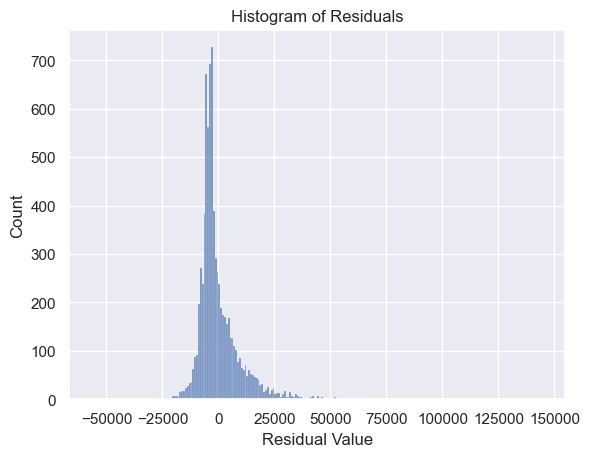

In [94]:

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

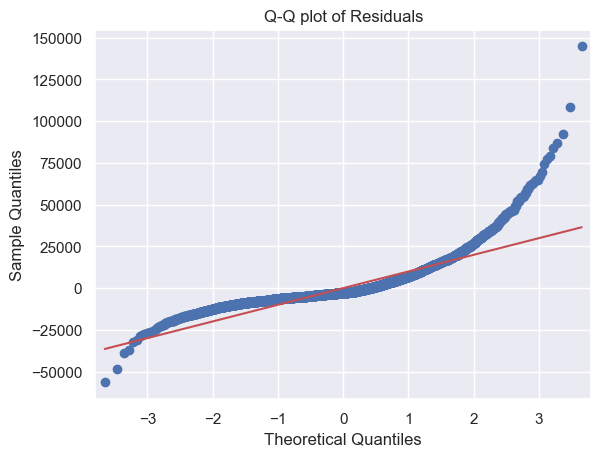

In [95]:

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [96]:

fitted_values = model.predict(rl_data["dorms"])

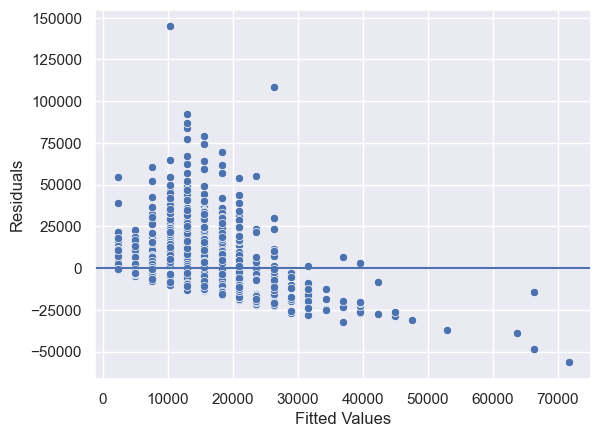

In [97]:

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In [99]:
import plotly.express as px


fig = px.scatter(df, x="dorms", y="price_uf", trendline="ols")
fig.show()

In [115]:
df2 = df.groupby('comuna').filter(lambda x: x.shape[0] >= 20).copy()

In [117]:
import pandas as pd
import statsmodels.api as sm



# Definir una función para ajustar el modelo de regresión lineal
def regression_by_group(group):
    X = group['dorms']  # Variable independiente (número de dormitorios)
    y = group['price_uf']  # Variable dependiente (precio)
    X = sm.add_constant(X)  # Añadir constante para la intersección
    model = sm.OLS(y, X).fit()  # Ajustar el modelo OLS
    return model.summary()  # Devolver el resumen del modelo

# Agrupar por comuna y aplicar la función de regresión
resultados = df2.groupby('comuna').apply(regression_by_group)

# Mostrar los resultados para cada comuna (es largisimo)
for comuna, resultado in resultados.items():
    print(f"\nComuna: {comuna}\n")
    print(resultado)


Comuna: Buin

                            OLS Regression Results                            
Dep. Variable:               price_uf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     92.09
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.29e-16
Time:                        19:07:21   Log-Likelihood:                -1181.8
No. Observations:                 125   AIC:                             2368.
Df Residuals:                     123   BIC:                             2373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4823.8617   1079.578     

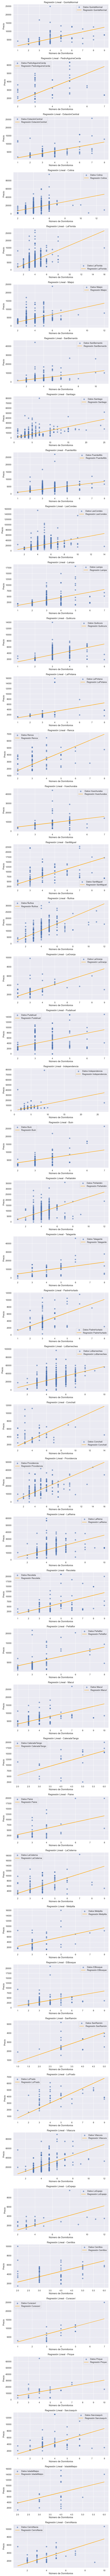

In [131]:
def regression_and_plot(group):
    X = group['dorms']
    y = group['price_uf']
    X_with_const = sm.add_constant(X)  # Añadir constante para la intersección
    model = sm.OLS(y, X_with_const).fit()  # Ajustar el modelo
    
    # Predecir los valores usando el modelo ajustado
    group['predicted'] = model.predict(X_with_const)
    
    # Devolver el grupo con la columna de valores predichos
    return group
df_with_predictions = df2.groupby('comuna').apply(regression_and_plot)
comunas = df2['comuna'].unique()
num_comunas = len(comunas)

# Iterar por cada comuna para crear subgráficos
fig, axs = plt.subplots(num_comunas, 1, figsize=(8, num_comunas * 4))  # Un gráfico por fila

#  Iterar por cada comuna para crear un gráfico separado
for i, comuna in enumerate(comunas):
    comuna_data = df_with_predictions[df_with_predictions['comuna'] == comuna]
    
    # Scatter plot de los datos reales en su subplot respectivo
    axs[i].scatter(comuna_data['dorms'], comuna_data['price_uf'], label=f'Datos {comuna}', alpha=0.6)
    
    # Línea de regresión en el mismo subplot
    axs[i].plot(comuna_data['dorms'], comuna_data['predicted'], color='orange', label=f'Regresión {comuna}')
    
    # Añadir título y etiquetas a cada subplot
    axs[i].set_title(f'Regresión Lineal - {comuna}')
    axs[i].set_xlabel('Número de Dormitorios')
    axs[i].set_ylabel('Precio')
    axs[i].legend()

# Ajustar el layout para evitar sobreposiciones
plt.tight_layout()
plt.show()